In [30]:
energy <- read.table("../data/residuals_energy_FY.txt", header = TRUE)
energy_res = energy$V1

In [34]:
fn <- read.table("../data/residuals_finance_FY.txt", header = TRUE)
finance_res = fn$V1

In [32]:
library(VineCopula)
library(rugarch)
library(fGarch)

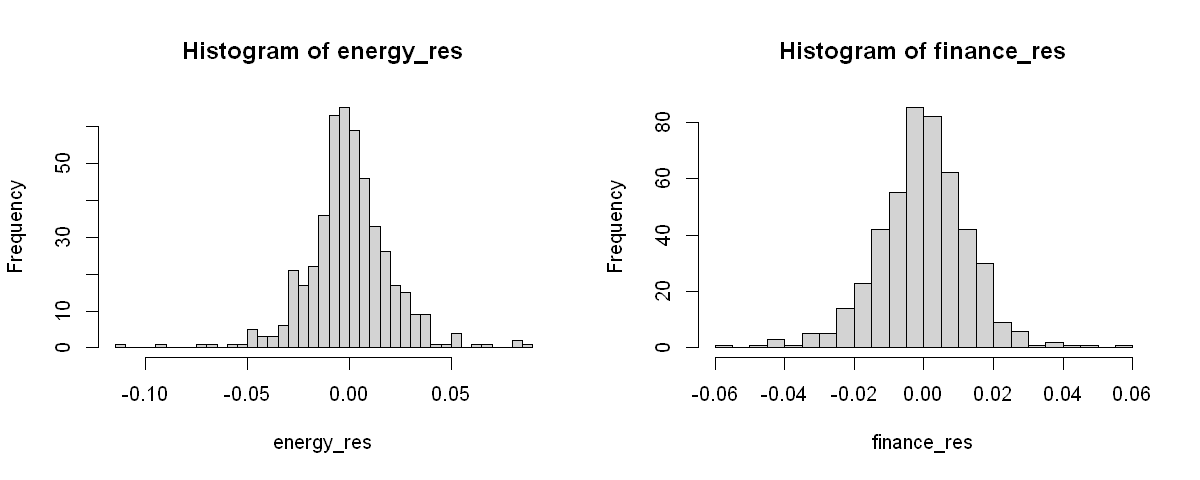

In [35]:
options(repr.plot.width = 10, repr.plot.height = 4)
par(mfrow = c(1, 2))
p1 = hist(energy_res, breaks = 40)
p2 = hist(finance_res, breaks = 40)
par(mfrow = c(1, 1)) # return to the default


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  x1
D = 0.032351, p-value = 0.7065
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  x2
D = 0.041475, p-value = 0.3912
alternative hypothesis: two-sided


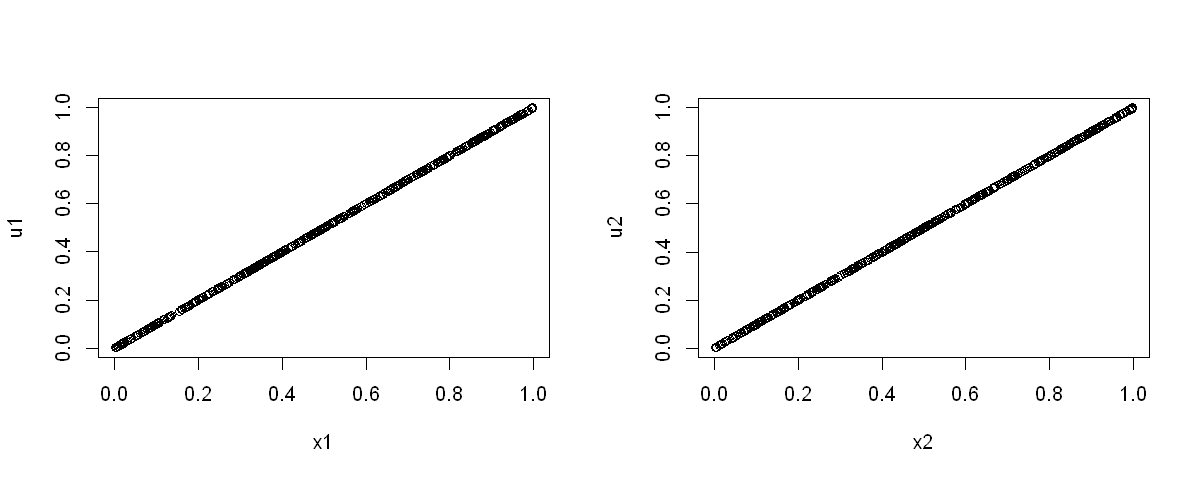

In [36]:
u1<-pstd((energy_res-mean(energy_res))/sd(energy_res),0,1,4.00553268808465)
# u1<-pstd(energy_res,0,1,4.00553268808465)
# u2<-pstd(energy_res,0,1,nu=7.884)#概率积分转换
# 1.55489180343118xi0.939194610023982
u2<-pstd((fn_res-mean(fn_res))/sd(fn_res),0,1,7.99637837645835)
# u2<-pstd((fn_res-mean(fn_res))/sd(fn_res),0,1,7.99637837645835)
#psstd(q, mean = 0, sd = 1, nu = 5, xi = 1.5)
#nu为偏t分布的自由度，xi为偏度系数

x1<-as.matrix(u1)
x2<-as.matrix(u2)
ks.test(x1,'punif')
ks.test(x2,'punif')
# #K-S检验,原假设为u1、u2服从均匀分布

# #K-S检验,原假设为u1、u2服从均匀分布
options(repr.plot.width = 10, repr.plot.height = 4)
par(mfrow = c(1, 2))
p1 = qqplot(x1,u1)
p2 = qqplot(x2,u2)
par(mfrow = c(1, 1)) # return to the default

Warning message:
"package 'gridExtra' was built under R version 4.3.3"
Warning message:
"The dot-dot notation (`..level..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(level)` instead."


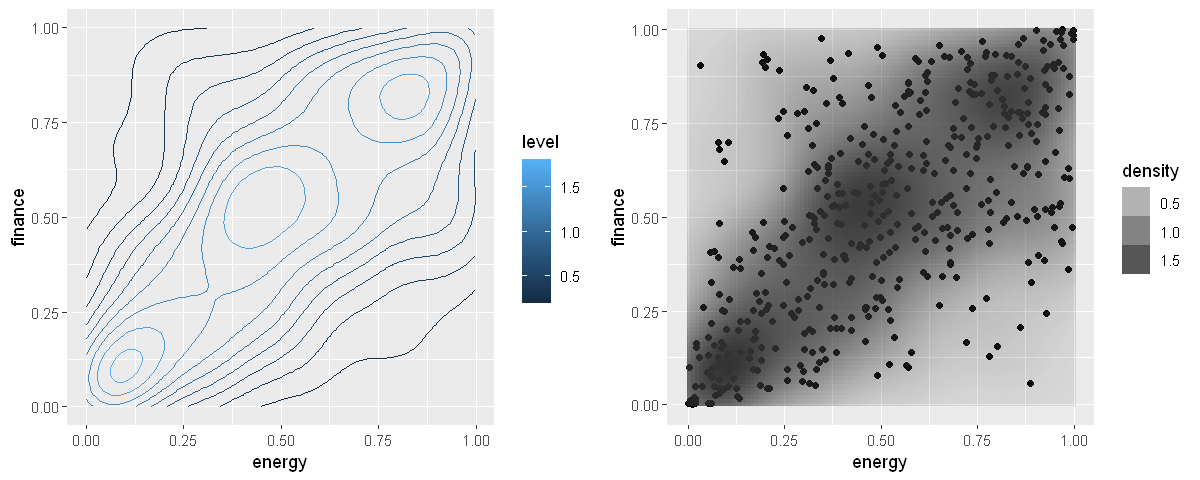

In [39]:
library(ggplot2)
library(gridExtra)

p1 <- ggplot()
# 基函数
p1 = ggplot(data.frame(energy=u1, finance=u2), aes(x = energy, y = finance)) +
  # 密度图函数：colour设置等高线颜色
  stat_density2d(aes(colour = ..level..))

p2 <- ggplot()
p2 =ggplot(data.frame(energy=u1, finance=u2), aes(x = energy, y = finance)) +
  # 散点图函数
  geom_point() +
  # 密度图函数：alpha设置填充透明度数据为密度，geom设置绘制栅格图
  stat_density2d(aes(alpha = ..density..), geom = "raster", contour = FALSE)

options(repr.plot.width = 10, repr.plot.height = 4)

grid.arrange(p1, p2, ncol = 2, widths = c(0.4, 0.4), heights = c(0.6))

In [76]:
Cop1=BiCopSelect(u1,u2,familyset = c(1,2,3,4,5,6,7,9),se =TRUE, rotations = FALSE)
#Copula估计，se表示计算标准误， rotation表示是否考虑旋转Copula，选择标准默认是AIC
#familyset是copula类型集合，主要是选择几种常见的copula族（norm t clayton gumbel frank SJC）
summary(Cop1)#查看估计结果
#对于依赖参数和尾部相关系数、秩相关系数间的转换，可以使用BiCopPar2TailDep和BiCopPar2Tau函数

Family
------ 
No:    7
Name:  BB1

Parameter(s)
------------
par:  0.83  (SE = 0.13)
par2: 1.27  (SE = 0.07)
Dependence measures
-------------------
Kendall's tau:    0.44 (empirical = 0.45, p value < 0.01)
Upper TD:         0.27 
Lower TD:         0.52 

Fit statistics
--------------
logLik:  141.82 
AIC:    -279.63 
BIC:    -271.32 



In [75]:
Cop1=BiCopSelect(u1,u2,familyset = c(1),se =TRUE, rotations = FALSE)
#Copula估计，se表示计算标准误， rotation表示是否考虑旋转Copula，选择标准默认是AIC
#familyset是copula类型集合，主要是选择几种常见的copula族（norm t clayton gumbel frank SJC）
summary(Cop1)#查看估计结果
#对于依赖参数和尾部相关系数、秩相关系数间的转换，可以使用BiCopPar2TailDep和BiCopPar2Tau函数

Family
------ 
No:    1
Name:  Gaussian

Parameter(s)
------------
par:  0.65  (SE = 0.02)

Dependence measures
-------------------
Kendall's tau:    0.45 (empirical = 0.45, p value < 0.01)
Upper TD:         0 
Lower TD:         0 

Fit statistics
--------------
logLik:  129.34 
AIC:    -256.68 
BIC:    -252.52 



In [66]:
# install.packages("psych")

In [71]:
# help(pairs.panels)

,energy,finance
energy,1.0000000,0.6136854
finance,0.6136854,1.0000000


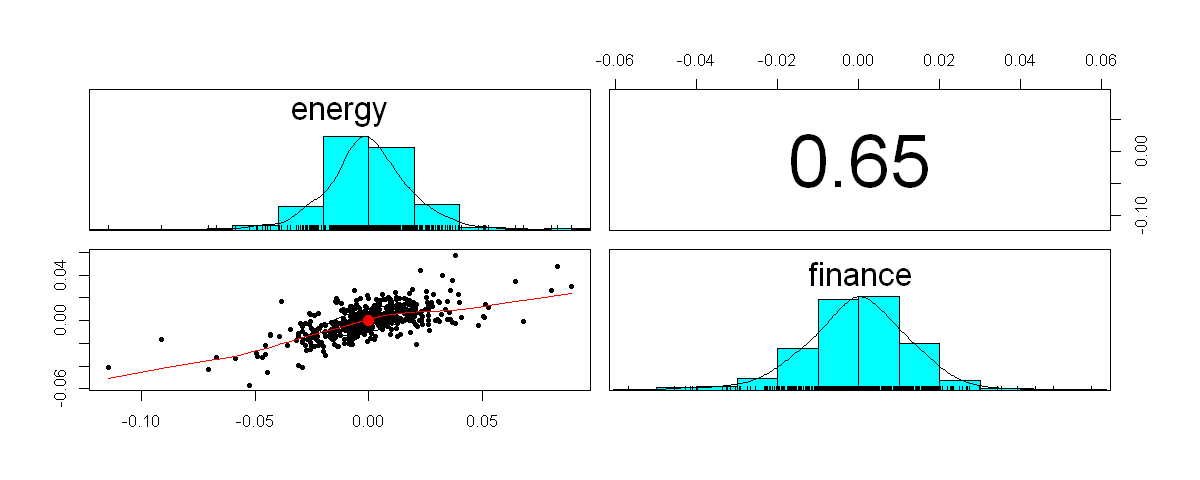

In [72]:
library(psych)
data1 = data.frame(energy=energy_res, finance=finance_res)
cor(data1, method='spearman')
pairs.panels(data1)
# The lower off diagonal draws scatter plots, the diagonal histograms, the upper off diagonal reports the Pearson correlation (with pairwise deletion).

,energy,finance
energy,1.0000000,0.6136854
finance,0.6136854,1.0000000


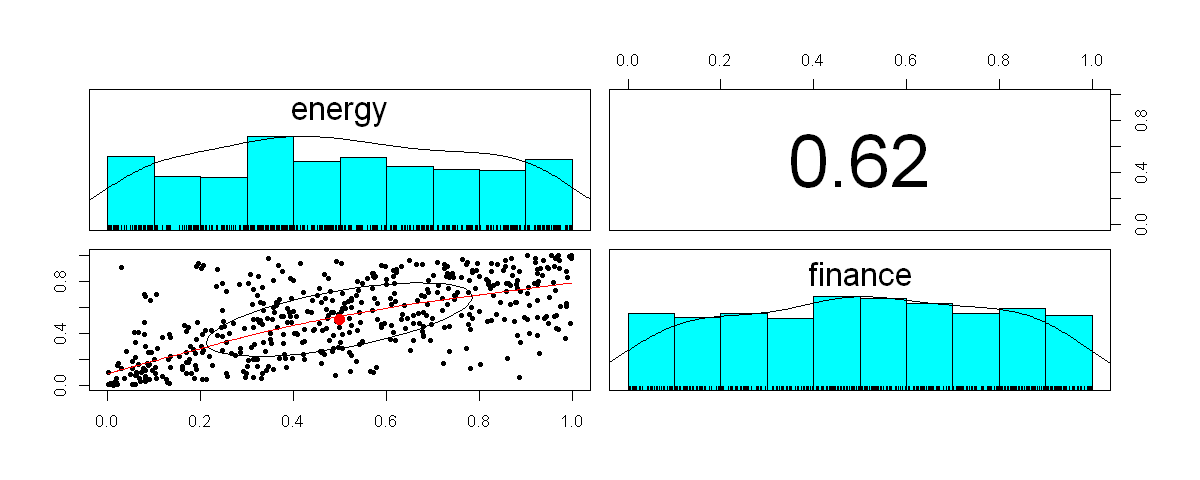

In [73]:
library(psych)
data2 = data.frame(energy=u1, finance=u2)
cor(data2,method='spearman')
pairs.panels(data2)